🏡 California Housing Price Prediction using Deep Neural Networks

📁 Portfolio Project by Aishwarya

This notebook demonstrates a custom deep learning model to predict housing prices in California districts using the California Housing dataset from Scikit-learn. The model architecture, training strategy, and optimization techniques — including dropout, L2 regularization, early stopping, and learning rate tuning — have been carefully implemented to reflect a strong understanding of neural network design and regression modeling using TensorFlow/Keras.

*The 8 input features are the following:*

**MedInc:** median income in block group

**HouseAge:** median house age in block group

**AveRooms:** average number of rooms per household

**AveBedrms:** average number of bedrooms per household

**Population:** block group population

**AveOccup:** average number of household members

**Latitude:** block group latitude

**Longitude:** block group longitude

*The target variable is a scalar: the median house value for California districts, in dollars.*


Let's load, split and scale the California housing dataset:

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [3]:
len(X_train_full)

15480

In [4]:
len(X_test)

5160

In [5]:
len(X_valid)

3870

In [6]:
len(X_train)

11610

In [7]:
# Convert X_train into a DataFrame with attribute names
df_train = pd.DataFrame(X_train, columns=housing.feature_names)

# Print the DataFrame
print(df_train.head())  # Print the first few rows of the DataFrame


   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  3.5214      15.0  3.049945   1.106548      1447.0  1.605993     37.63   
1  5.3275       5.0  6.490060   0.991054      3464.0  3.443340     33.69   
2  3.1000      29.0  7.542373   1.591525      1328.0  2.250847     38.44   
3  7.1736      12.0  6.289003   0.997442      1054.0  2.695652     33.55   
4  2.0549      13.0  5.312457   1.085092      3297.0  2.244384     33.93   

   Longitude  
0    -122.43  
1    -117.39  
2    -122.98  
3    -117.70  
4    -116.93  


Let us standardize the data

In [8]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [9]:
len(X_train)

11610

In [10]:
len(X_valid)

3870

Let us now define the model architecture

In [12]:

from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.callbacks import EarlyStopping

# Clear Keras backend session and set seeds for reproducibility
# This helps ensure that model training results are consistent across runs
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

#  Define a deep feedforward neural network for regression
# Includes L2 regularization and dropout to reduce overfitting
model = keras.models.Sequential([
    # First hidden layer with 128 neurons, ReLU activation, and L2 regularization
    layers.Dense(128, activation="relu", input_shape=X_train.shape[1:],
                 kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),  # Randomly drops 30% of neurons during training

    # Second hidden layer with 64 neurons and regularization
    layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l2(0.001)),
    layers.Dropout(0.3),

    # Third hidden layer without regularization (acts as transition layer)
    layers.Dense(32, activation="relu"),

    # Output layer with 1 neuron for predicting a single continuous value
    layers.Dense(1)
])

#  Compile the model using Adam optimizer with custom learning rate
# MSE (Mean Squared Error) is used as the loss function for regression
optimizer = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss="mean_squared_error", optimizer=optimizer)

#  Define EarlyStopping to monitor validation loss and prevent overfitting
# Training stops if no improvement is seen for 5 epochs, and restores best weights
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

#  Train the model for up to 50 epochs with validation data
# Early stopping ensures efficient training and good generalization
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_valid, y_valid),
    callbacks=[early_stop]
)


Epoch 1/50


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.6101 - val_loss: 0.8045
Epoch 2/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.6285 - val_loss: 0.4649
Epoch 3/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5627 - val_loss: 0.4430
Epoch 4/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5212 - val_loss: 0.4460
Epoch 5/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5085 - val_loss: 0.4446
Epoch 6/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.5011 - val_loss: 0.5720
Epoch 7/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4741 - val_loss: 0.4360
Epoch 8/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4579 - val_loss: 0.3958
Epoch 9/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.4553 - val_loss: 0.5711
Epoch 10/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.4382 - val_loss: 0.3798
Epoch 11/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.4233 - val_loss: 0.4630
Epoch 12/50
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.

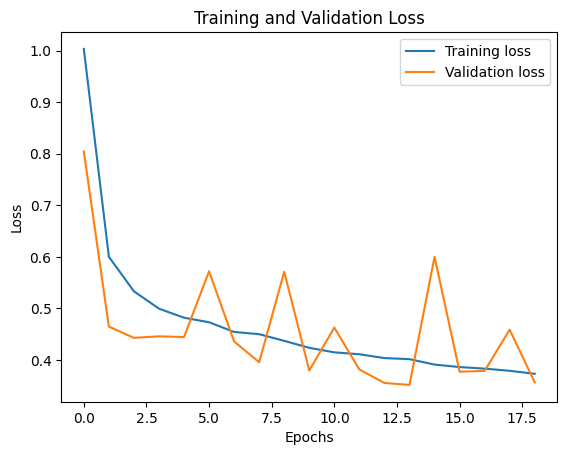

In [13]:
# Plot the loss
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.show()

Let us evaluate the model testing performance

In [14]:
# Evaluate the model on the test set
mse_test = model.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.3621


In [15]:

# Make predictions on new data
X_new = X_test[:3]
y_pred = model.predict(X_new)

# Compare predictions with actual values
for i in range(len(X_new)):
    print(f"Sample {i+1}:")
    print(f"Predicted: {y_pred[i][0]}")
    print(f"Actual: {y_test[i]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Sample 1:
Predicted: 0.7316420674324036
Actual: 0.477
Sample 2:
Predicted: 1.682723045349121
Actual: 0.458
Sample 3:
Predicted: 4.261172294616699
Actual: 5.00001
